# Introduction

<p style='text-align: justify;'>
Spider-Man is, without a doubt, one of the most popular superheroes of all time. Stan Lee's web-head made its name in pop culture through comic books, cartoons, and movies. However, Spider-Man hadn't seen a decent amount of sucess on the big screen until <a href='https://en.wikipedia.org/wiki/Spider-Man_(2002_film)/'>Sam Raimi's first installment of the superhero's trilogy</a>. The movie was a huge sucess, becoming the first movie to gross over $100 million on its opening weekend.

<p style='text-align: justify;'>
Many experts say that it was the kickstart for the superhero blockbusters in Hollywood. The website The Collider states in the article <a href='https://collider.com/sam-raimi-spider-man-changed-superhero-movies/'>"15 Years Later, Sam Raimi’s ‘Spider-Man’ Is Both a Trendsetter and a Throwback"</a> that, "All superhero movies owe a debt to Spider-Man for not only breaking through at the box office, but by showing that there was a space for superheroes to carry a blockbuster identity that was still big, bold, and distinctive.”

<p style='text-align: justify;'>
The purpose of this project is to show, through data, <b>the impact of Sam Raimi's "Spider-Man" in the superhero movie industry</b>.

This project will use a dataset from TMDB provided by kaggle with 5000 movies selected by TMDB from 1916 - 2017. This dataset can be found at https://www.kaggle.com/tmdb/tmdb-movie-metadata.

Here are the main columns used from the dataset:

<b> Title </b> - Title of the movie

<b> Release_date </b> - Release date of the movie

<b> Keyword </b> - Keywords related to the genre of the movie

<b> Revenue </b> - Revenue of the movie

<b> Popularity </b> - Popularity scale from 0 to 875.

</p>

# Data Cleaning

In [1]:
#Import from the libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
%matplotlib inline

In [2]:
#Read the csv file and show the data
movies = pd.read_csv('./tmdb_5000_movies.csv')
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.describe().round()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4803.0,4.803000e+03,4801.0,4803.0,4803.0
mean,29045040.0,57165.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,88695.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,9014.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,14629.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,58610.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,459488.0,876.0,2.787965e+09,338.0,10.0,13752.0


In [4]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
#Convert the date column to a date type column
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [6]:
#Check for null values inside the columns
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
#Filter the dataframe so that the null values in the 'release_date' column do not show up
movies = movies[movies['release_date'].notna()]

Since the null values are inside columns that don't affect the data or that won't be used at all, they are left as is. The only column that affects the analysis and has null values is the 'release_date' column. The 1 single row of null data is filtered from that column out of the dataframe.

# Data Preparation

In [8]:
#Filter the dataframe with the columns that will be used
movies = movies.loc[:,['keywords', 'title', 'popularity', 'release_date', 'revenue']]

movies.head()

,keywords,title,popularity,release_date,revenue
0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,150.437577,2009-12-10,2787965087
1,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000
2,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,107.376788,2015-10-26,880674609
3,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,112.312950,2012-07-16,1084939099
4,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,43.926995,2012-03-07,284139100


In [9]:
#Create functions to get the value 'superhero' out of the keywords column


def fix_keywords(x):
    x = ast.literal_eval(x) #Convert list stored as string to a list
    key_words = []
    for i in x:
            key_words.append(list(i.values())[1]) #Create a list of the values stored in the 'name' key of the dictionary
    return key_words

def contains_superhero(x): #Check if the genre list contains the 'superhero' genre
    if 'superhero' in x:
       return 1
    return 0


In [10]:
#Create columns to help filter the superhero genre movies using the previous functions created
movies['contains_sp'] = movies['keywords'].apply(lambda x: contains_superhero(fix_keywords(x)))
    
movies = movies.drop(columns = 'keywords') #Remove the column 'keywords' as it will no longer be needed
movies.head()

,title,popularity,release_date,revenue,contains_sp
0,Avatar,150.437577,2009-12-10,2787965087,0
1,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,0
2,Spectre,107.376788,2015-10-26,880674609,0
3,The Dark Knight Rises,112.312950,2012-07-16,1084939099,1
4,John Carter,43.926995,2012-03-07,284139100,0


In [11]:
#Filter the dataframe with superhero-classified movies only
movies = movies[movies['contains_sp'] == 1]
movies.head()

,title,popularity,release_date,revenue,contains_sp
3,The Dark Knight Rises,112.312950,2012-07-16,1084939099,1
5,Spider-Man 3,115.699814,2007-05-01,890871626,1
7,Avengers: Age of Ultron,134.279229,2015-04-22,1405403694,1
9,Batman v Superman: Dawn of Justice,155.790452,2016-03-23,873260194,1
10,Superman Returns,57.925623,2006-06-28,391081192,1


In [12]:
#Create dataframes and columns that will be needed later on

movies['year'] = movies['release_date'].dt.year 

#Group main dataframe by year
movies_grouped = movies.groupby('year').sum().reset_index()

after_spiderman = movies[movies['release_date'] > pd.to_datetime('2002-05-01')] #Movies after spider-man's release
before_spiderman = movies[movies['release_date'] < pd.to_datetime('2002-05-01')] #Movies before spider-man's release

#Groups by year the after and before dataframes created
after_spiderman_grouped = after_spiderman.groupby('year').sum().reset_index()
before_spiderman_grouped = before_spiderman.groupby('year').sum().reset_index()

#Calculate superhero movies per year after spider-man's release
after_movies_per_year = (after_spiderman_grouped.sum()['contains_sp'] / len(after_spiderman_grouped)).round(2)

#Calculate superhero movies per year before spider-man's release
before_movies_per_year = (before_spiderman_grouped.sum()['contains_sp'] / len(before_spiderman_grouped)).round(2)

## Data Visualization

First, let's analyze superhero movie revenues throughout the years to see if there is any particular year that could be responsible for the superhero movie boost.

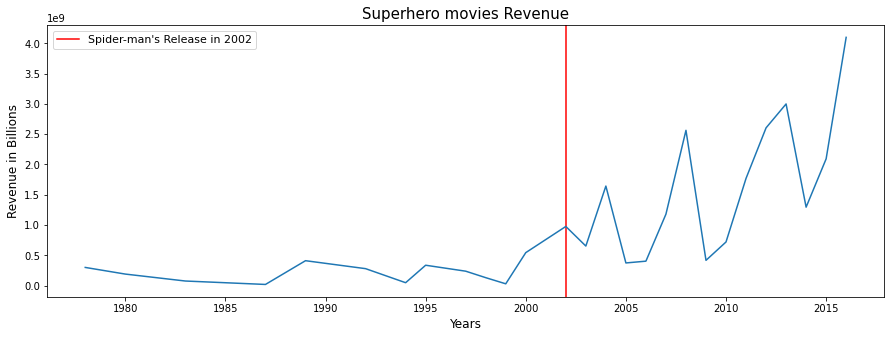

In [13]:
x = movies_grouped['year']
y = movies_grouped['revenue']
plt.figure(figsize = (15,5))
plt.axvline(x=2002, label='line at x = {}'.format(2002), c='red') #Trace line to state Spider-man's release
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Revenue in Billions',fontsize = 12)
plt.title('Superhero movies Revenue', fontsize = 15)
plt.legend( ["Spider-man's Release in 2002"],loc='upper left', fontsize = 11)
plt.plot(x,y)
plt.xticks()
plt.show()

It's important to state that there were no superhero movies in 2001 according to the dataset.

In [14]:
#No superhero movies in 2001
movies_grouped[movies_grouped['year']== 2001]

,year,popularity,revenue,contains_sp



By analyzing the previous graph, it is possible to see that there was a shift between the years of 1998 and 2002 that made an impact on the superhero movies revenue afterwards. <b>One could say that any of those movies in that period of time could be the reason why, and not necessarily "Spider-Man", right?</b> Well, let's first dive deeper into that data.

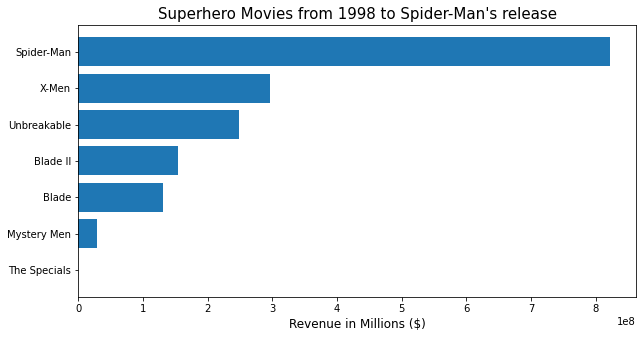

In [15]:
#Filter movies between 1998 and Spider-man's release date and sort by the revenue column
movies_until_spidey = movies[(movies['release_date'] >= pd.to_datetime('1998-01-01')) & (movies['release_date'] <= pd.to_datetime('2002-05-01'))]
movies_until_spidey = movies_until_spidey.sort_values(by = 'revenue', ascending = True)

x = movies_until_spidey['title']
y = movies_until_spidey['revenue']

plt.figure(figsize = (10,5))
plt.xlabel('Revenue in Millions ($)', fontsize = 12)
plt.title("Superhero Movies from 1998 to Spider-Man's release", fontsize = 15)
plt.barh(x,y)
plt.show()

Looking at this graph, let's think about that question again, <b>can one say that any of the movies in that time period is the reason to boost the superhero movies?</b> The answer is <b>no</b>. The difference in revenue "Spider-Man" had was much significant. <b>Therefore, if any of those movies was reponsable for that effect in the time period, it had to have been "Spider-Man". </b>

Now, let's analyze the data from before and after the release of Spider-Man.

In [16]:
#Create 1 dataframe about the popularity before and after the release of Spider-Man
x= before_spiderman['popularity']
y= after_spiderman['popularity'] 

popularity_df = pd.concat([x, y], axis=1)
popularity_df.columns =  ['Before Spider-Man','After Spider-Man']  

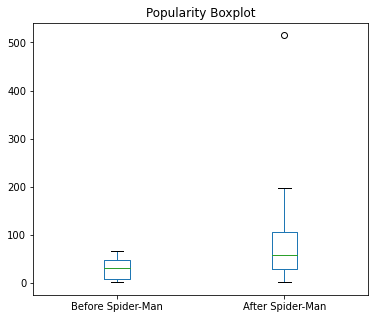

In [17]:
popularity_df.plot(kind='box', figsize = (6,5))
plt.title('Popularity Boxplot')
plt.show()

Numbers show on the boxplot that after the first "Spider-Man" movie, the popularity of superhero movies had a big increase, including a very distant outlier from the maximum popularity. 

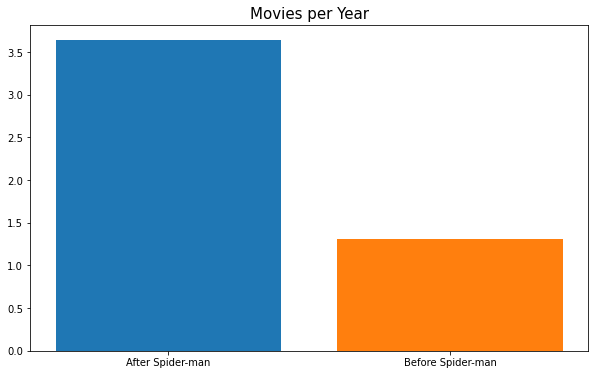

In [18]:
x = after_movies_per_year
y = before_movies_per_year

plt.figure(figsize = (10,6))
plt.title("Movies per Year", fontsize = 15)
plt.bar('After Spider-man',x)
plt.bar('Before Spider-man', y)
plt.show()

In this bar graph, it is possible to see that <b>after Spider-Man's</b> first movie, there were more than 3.5 superhero movies per year. Meanwhile, <b>before the movie came out</b>, less than 1.5 superhero movies were released every year.

# Conclusion

<p style='text-align: justify;'>
Data shows that there were many important superhero movies released around 1998 and 2002, such as "X-men." But not only was "Spider-Man" a huge sucess, it also completely broke the pattern of revenue that came along the years for superhero movies, taking it to a whole other level. The popularity of the genre increased after Sam Raimi's "Spider-Man" and numbers doubled for superhero-related productions in the industry.

<p style='text-align: justify;'>
Maybe if it weren't for "Spider-Man," there would not have been wonderful cinematic universes and crossovers as there are today. The trilogy definetely had a huge impact not only in Hollywood, but on many people's lives.

Hope you enjoyed it.